In [1]:
import pandas as pd

df = pd.read_excel(r"C:\Users\analyst2.LCA\OneDrive - crescendoam.com\Desktop\Feb 2023\QQQ.xlsx")


In [2]:
df.rename(columns = {'Ticker':'Date'}, inplace = True )

In [3]:
df.drop([0,1,2],inplace = True)

In [4]:
df.set_index(['Date'],inplace = True)

<AxesSubplot:xlabel='Date'>

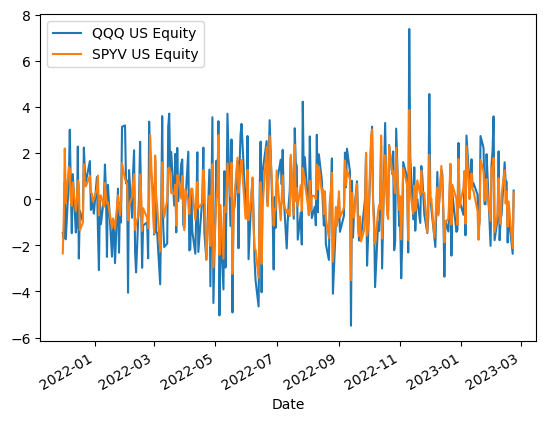

In [5]:
df.plot.line()

In [6]:
df.index = df.index.to_period('D')

In [7]:
df['2022']

C:\Users\analyst2.LCA\AppData\Local\Temp\ipykernel_24024\1862537852.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2022']


,QQQ US Equity,SPYV US Equity
Date,,
2022-01-03,0.9627,0.4286
2022-01-04,-1.2971,1.0194
2022-01-05,-3.0721,-0.7041
2022-01-06,-0.0703,0.1418
2022-01-07,-1.0833,0.1652
...,...,...
2022-12-23,0.2249,0.6226
2022-12-27,-1.4138,0.0000
2022-12-28,-1.3203,-1.1085


In [8]:
df.index

PeriodIndex(['2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
             '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09',
             '2021-12-10', '2021-12-13',
             ...
             '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-13',
             '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
             '2023-02-21', '2023-02-22'],
            dtype='period[D]', name='Date', length=309)

In [9]:
wealth_index = 1000*(1+(df["QQQ US Equity"]/100)).cumprod()

In [10]:
wealth_index

Date
2021-11-30       985.314
2021-12-01    968.550853
2021-12-02    975.531199
2021-12-03    958.567687
2021-12-06     966.24869
                 ...    
2023-02-15    780.036466
2023-02-16    765.399861
2023-02-17      759.9992
2023-02-21    742.006219
2023-02-22    744.782064
Freq: D, Name: QQQ US Equity, Length: 309, dtype: object

<AxesSubplot:xlabel='Date'>

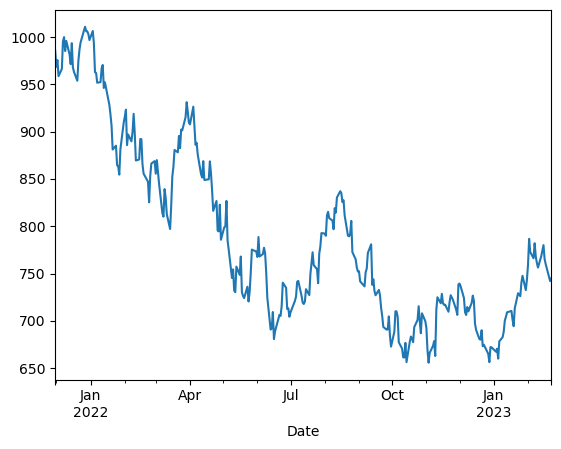

In [11]:
wealth_index.plot.line()

In [12]:
previous_peaks = wealth_index.cummax()

<AxesSubplot:xlabel='Date'>

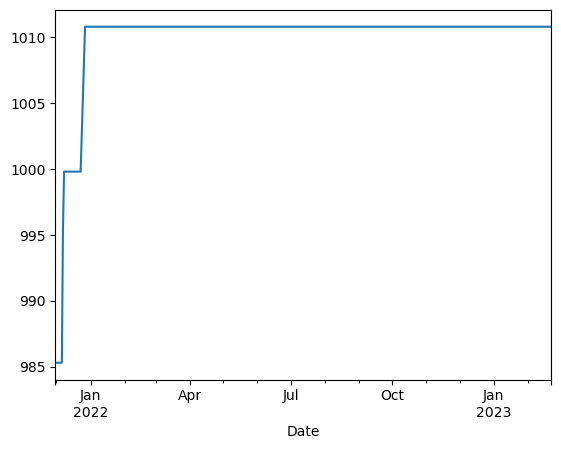

In [13]:
previous_peaks.plot()

<AxesSubplot:xlabel='Date'>

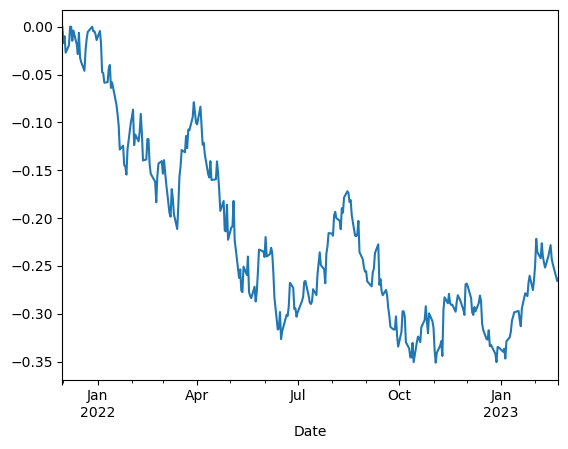

In [14]:
drawdown = (wealth_index - previous_peaks)/ previous_peaks
drawdown.plot()

In [15]:
drawdown.head()

Date
2021-11-30         0.0
2021-12-01   -0.017013
2021-12-02   -0.009929
2021-12-03   -0.027145
2021-12-06   -0.019349
Freq: D, Name: QQQ US Equity, dtype: object

In [16]:
drawdown = drawdown.astype(float)

In [17]:
drawdown.min()


-0.3512251927153335

In [18]:
drawdown.idxmin()

Period('2022-11-03', 'D')

In [22]:
def drawdown(return_series: pd.Series):
    
    wealth_index = 1000*(1+return_series/100).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks

    
    return pd.DataFrame ({"Wealth":wealth_index,"Peaks":previous_peaks,"Drawdown":drawdowns})

In [25]:
drawdown(df["QQQ US Equity"])

,Wealth,Peaks,Drawdown
Date,,,
2021-11-30,985.314,985.314,0.0
2021-12-01,968.550853,985.314,-0.017013
2021-12-02,975.531199,985.314,-0.009929
2021-12-03,958.567687,985.314,-0.027145
2021-12-06,966.24869,985.314,-0.019349
...,...,...,...
2023-02-15,780.036466,1010.785123,-0.228287
2023-02-16,765.399861,1010.785123,-0.242767
2023-02-17,759.9992,1010.785123,-0.24811


<AxesSubplot:xlabel='Date'>

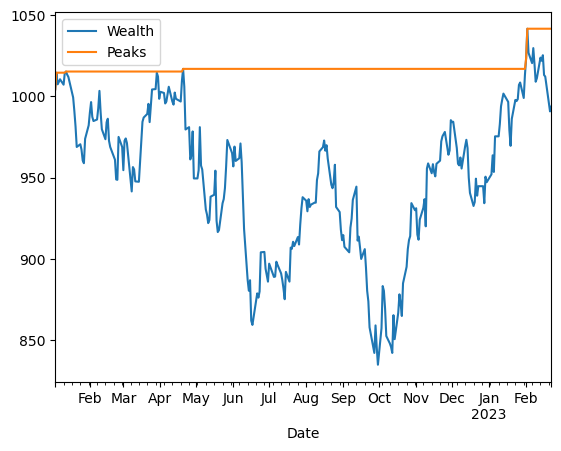

In [38]:
drawdown(df['2022':]["SPYV US Equity"])[["Wealth","Peaks"]].plot()

In [40]:
drawdown(df["SPYV US Equity"])[["Drawdown"]].min()

Drawdown   -0.179087
dtype: float64

In [41]:
drawdown(df["QQQ US Equity"])[["Drawdown"]].min()

Drawdown   -0.351225
dtype: object

In [43]:
drawdown(df["SPYV US Equity"])[["Drawdown"]].idxmin()

Drawdown    2022-09-30
dtype: period[D]

In [47]:
drawdown(df["QQQ US Equity"])[["Drawdown"]].astype(float).idxmin()

Drawdown    2022-11-03
dtype: period[D]

In [48]:
%load_ext autoreload
%autoreload 2

In [49]:
import Risk_Kit as risk

In [51]:
risk.drawdown(df["QQQ US Equity"]).min()

Wealth      655.771923
Peaks          985.314
Drawdown     -0.351225
dtype: object